## Lab: Datasets & NumPy - csv's, funciones, numpy y distribuciones

Ejecuta la celda de abajo para cargar los paquetes requeridos

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd
%matplotlib inline

### Datos de ventas

Para este Lab vamos a usar una versión resumidade un dataset que contiente información sobre ventas de establecimientos económicos que analizaremos en detalle más adelante.

El csv tiene alrededor de 200 filas de datos y 4 columnas. El path especificado del csv ```sales_info.csv``` asume que se encuentra en el mismo directorio que la presente notebook. En caso que lo hayas descargado en otro directorio deberás hacer referencia de manera relativa o absoluta (googlear linux path examples relativa / absolute).

#### 1. Carga de datos

Utilizar el método ```read_csv``` de la librería Pandas para crear un dataframe a partir del archivo.

In [4]:
sales_info = pd.read_csv('Data/sales_info.csv')
print(sales_info.head(10))

   volume_sold  2015_margin  2015_q1_sales  2016_q1_sales
0    18.420760    93.802281      337166.53      337804.05
1     4.776510    21.082425       22351.86       21736.63
2    16.602401    93.612494      277764.46      306942.27
3     4.296111    16.824704       16805.11        9307.75
4     8.156023    35.011457       54411.42       58939.90
5     5.005122    31.877437      255939.81      332979.03
6    14.606750    76.518973      319020.69      302592.88
7     4.456466    19.337345       45340.33       55315.23
8     5.047530    26.142470       57849.23       42398.57
9     5.388070    22.427024       51031.04       56241.57


#### 2. Transformar la serie en un array de numpy

Utilizar el método ```np.array()``` transformar la serie "volume_sold" del dataframe generado en un array de numpy

In [54]:
volume_sold = np.array(sales_info['volume_sold'])

##### 3. Imprimir los 10 primeros items de la columna 'volume_sold' utilizando "array slicing".

In [55]:
volume_sold[:10]

array([ 18.42076049,   4.77650992,  16.60240061,   4.2961115 ,
         8.15602328,   5.00512243,  14.60675   ,   4.45646649,
         5.04752965,   5.38807024])

#### 4.  Imprimir el tipo de dato del array

Utilizar la propiedad de los arrays dtype para conocer el tipo de dato del array

In [56]:
volume_sold.dtype

dtype('float64')

#### 5. Escribir una función para imprimir la información resumida

La función debería:

- Tomar dos parámetros: el nombre de la columna y los datos asociados con esa columna
- Imprimir la información, indicando de forma clara en qué consiste cada item que se imprime:
    1. Imprimir el nombre de la columna
    2. Imprimir la media de los datos usando ```np.mean()```
    3. Imprimir la mediana de los datos usando ```np.median()``` 
    4. Imprimir la moda de los datos redondeados usando ```stats.mode()```
    5. Imprimir la varianza de los datos usando ```np.var()```
    6. Imprimir el desvío estándar de los datos usando ```np.std()```

Tener en cuenta que para poder imprimir, será necesario convertir los valores numéricos retornados por estas funciones a strings. Para ello usar la función ```str()```.

In [57]:
def display_info(name, data):
    print('name: ', name)
    print('mean:', np.mean(data))
    print('median:', np.median(data))
    mode, count = stats.mode(np.round(data, 2))
    print('mode:', mode)
    print('var:', np.var(data))
    print('std:', np.std(data))

##### **5.A** Usando la función definida, imprimir las medidas para 'volume_sold'

In [71]:
display_info('volume_sold', volume_sold)

name:  volume_sold
mean: 10.018684079
median: 8.16634551564
mode: [ 4.76]
var: 84.1299652005
std: 9.1722388325


##### **5.B** Usando la función definida, imprimir las medidas para '2015_margin'

In [67]:
data_2015_margin = np.array(sales_info['2015_margin'])
display_info('2015_margin', data_2015_margin)

name:  2015_margin
mean: 46.8588951379
median: 36.5621438181
mode: [ 36.28]
var: 2016.06166296
std: 44.9005753077


##### **5.C** Usando la función definida, imprimir las medidas para '2015_q1_sales'

In [68]:
data_2015_q1_sales = np.array(sales_info['2015_q1_sales'])
display_info('2015_q1_sales', data_2015_q1_sales)

name:  2015_q1_sales
mean: 154631.6682
median: 104199.41
mode: [ 4151.93]
var: 47430301462.3
std: 217784.989066


##### **5.D** Usando la función definida, imprimir las medidas para '2016_q1_sales'

In [69]:
data_2016_q1_sales = np.array(sales_info['2016_q1_sales'])
display_info('2016_q1_sales', data_2016_q1_sales)

name:  2016_q1_sales
mean: 154699.17875
median: 103207.2
mode: [ 3536.14]
var: 47139411653.4
std: 217116.124812


#### 6. Graficar las distribuciones

Hemos provisto una función para graficar más abajo llamado ```distribution_plotter()```. Toma dos parámetros, el nombre de la columna y los datos asociados a dicha columna.

En celdas individuales, graficar las distribuciones de cada una de las 4 columnas. ¿Los datos son asimétricos? ¿simétricos?

In [63]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribucion de ' + column + '\n', fontsize=16)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


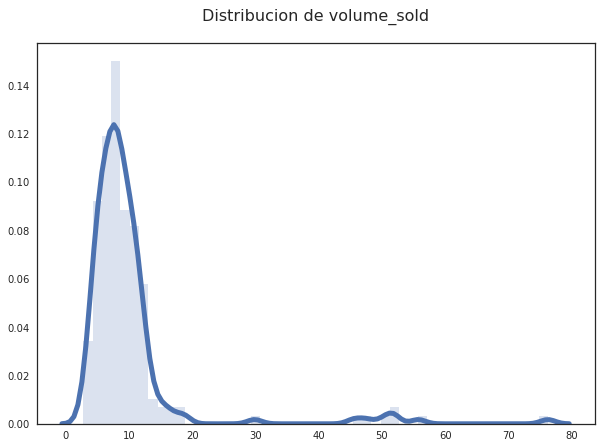

In [70]:
distribution_plotter('volume_sold', volume_sold)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


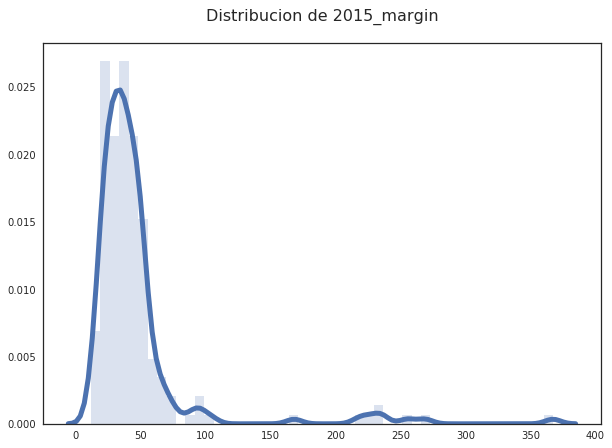

In [72]:
distribution_plotter('2015_margin', data_2015_margin)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


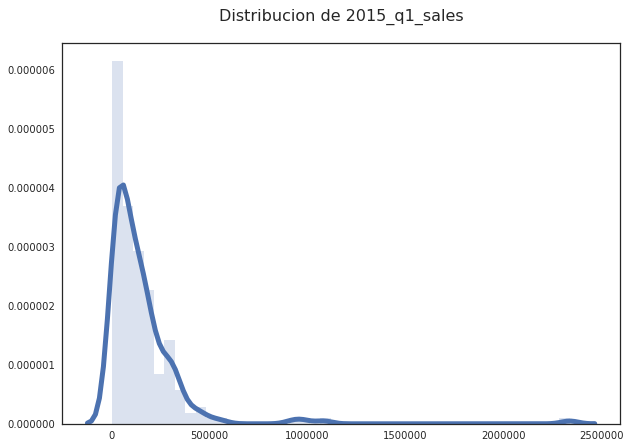

In [73]:
distribution_plotter('2015_q1_sales', data_2015_q1_sales)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


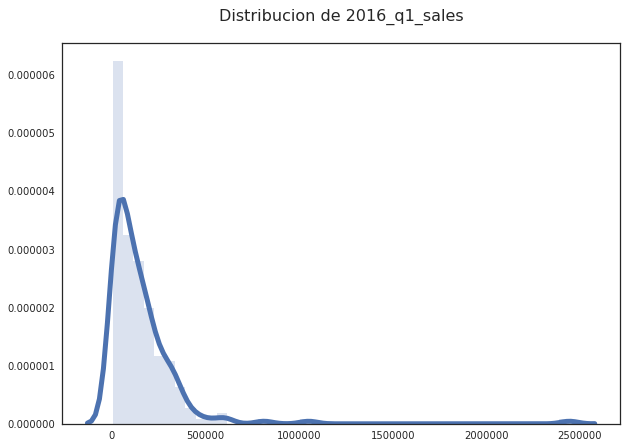

In [74]:
distribution_plotter('2016_q1_sales', data_2016_q1_sales)